# Telecom customer churn prediction

# Objective:-
Customer churn is often referred to as customer attrition, or customer defection which is the rate at which the customers are lost. Telecom companies often use customer churn as a key business metrics to predict the number of customers that will leave a telecom service provider. Churn is significant in the telecommunication industry because it directly affects the competitiveness of the service provider.

So We have to Predict that model which will focous on Churn customer.means Model will identify which customer will be Churn out.so the  managment will identifies they churn out customer.and according that thye will change the strategy to keep them with company.

so Its Case Of Recall We Have To Focous On Recall Score,Not Precison Score. 

Example. we predict 5% as churn and all are churn out so over precison is good. but what about rest of 95% so that we should focous on Recall Score.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [128]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [129]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [130]:
df.duplicated().sum()

0

In [131]:
tabel=[]

for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
pd.DataFrame(tabel,columns=['features','Unique No','Uniques Values'])

,features,Unique No,Uniques Values
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,2,"[Female, Male]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,2,"[No, Yes]"
7,MultipleLines,3,"[No phone service, No, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,"[No, Yes, No internet service]"


In [132]:
df.drop('customerID',axis=1,inplace=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [134]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [135]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [136]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print("Length Of Categorical_Features",len(categorical_features))
categorical_features

Length Of Categorical_Features 16


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [137]:
numerical_features=[features for features in df.columns if df[features].dtype!='O']
print("Length Of Numerical_Features",len(numerical_features))
numerical_features

Length Of Numerical_Features 4


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Visualization

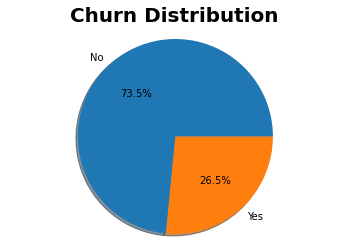

In [138]:
x=df['Churn'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title("Churn Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

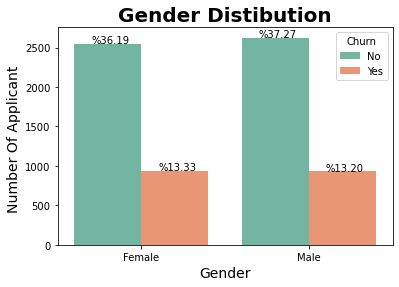

In [139]:
ax=sns.countplot(df['gender'],hue=df['Churn'],palette='Set2')
plt.title('Gender Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('Gender',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x()+0.1, p.get_height()+7))

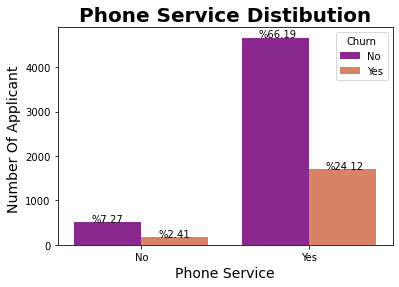

In [140]:
ax=sns.countplot(df['PhoneService'],hue=df['Churn'],palette='plasma')
plt.title('Phone Service Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('Phone Service',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x()+0.1, p.get_height()+7))

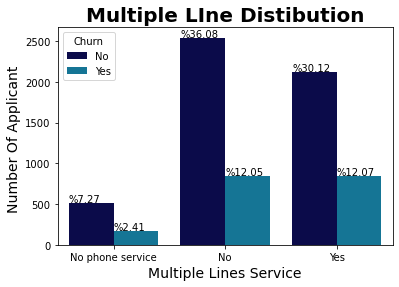

In [141]:
ax=sns.countplot(df['MultipleLines'],hue=df['Churn'],palette='ocean')
plt.title('Multiple LIne Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('Multiple Lines Service',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x(), p.get_height()+7))

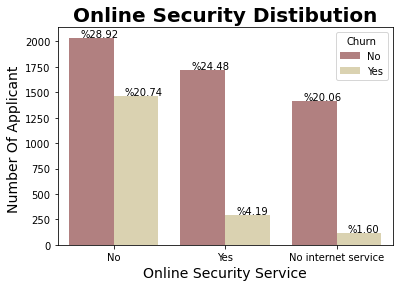

In [142]:
ax=sns.countplot(df['OnlineSecurity'],hue=df['Churn'],palette='pink')
plt.title('Online Security Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('Online Security Service',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x()+0.1, p.get_height()+7))

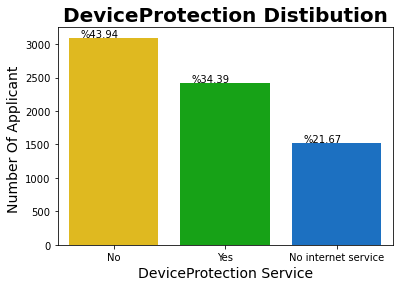

In [143]:
ax=sns.countplot(df['DeviceProtection'],palette='nipy_spectral_r')
plt.title('DeviceProtection Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('DeviceProtection Service',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x()+0.1, p.get_height()+7))

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

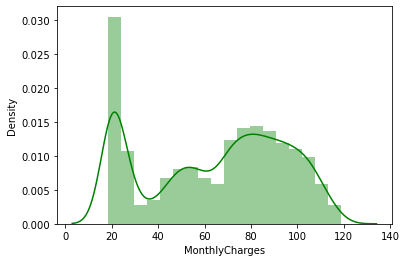

In [144]:
sns.distplot(df['MonthlyCharges'],color='green')

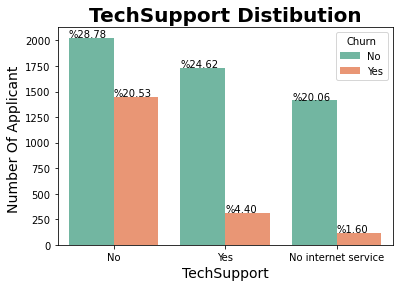

In [145]:
ax=sns.countplot(df['TechSupport'],hue=df['Churn'],palette='Set2')
plt.title('TechSupport Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('TechSupport',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x(), p.get_height()+7))

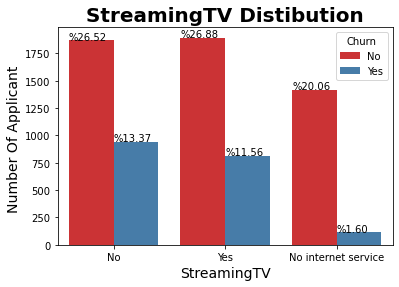

In [146]:
ax=sns.countplot(df['StreamingTV'],hue=df['Churn'],palette='Set1')
plt.title('StreamingTV Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('StreamingTV',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x(), p.get_height()+7))

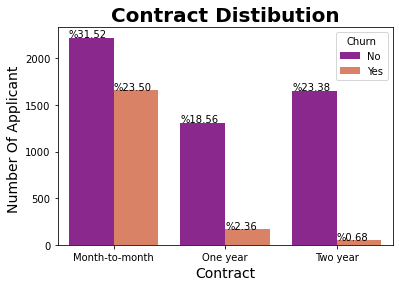

In [147]:
ax=sns.countplot(df['Contract'],hue=df['Churn'],palette='plasma')
plt.title('Contract Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('Contract',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x(), p.get_height()+7))

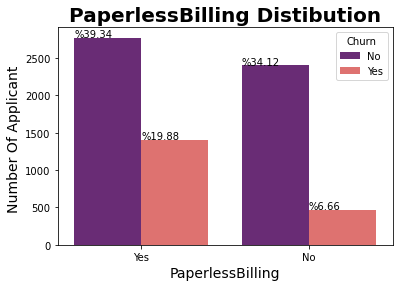

In [148]:
ax=sns.countplot(df['PaperlessBilling'],hue=df['Churn'],palette='magma')
plt.title('PaperlessBilling Distibution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('PaperlessBilling',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/7043*100), (p.get_x(), p.get_height()+7))

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

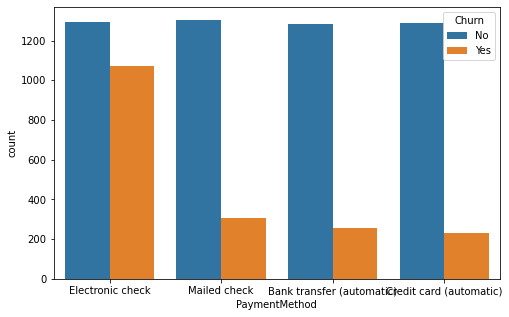

In [149]:
plt.figure(figsize=(8,5))
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

Text(0.5, 0, 'Monthly Charges')

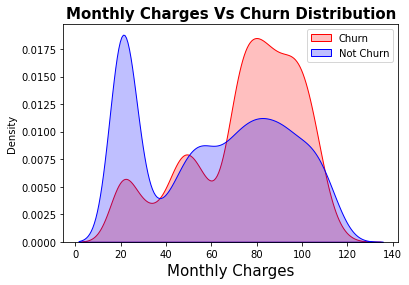

In [150]:
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'],color='Red',shade=True)
sns.kdeplot(df[df['Churn']=='No']['MonthlyCharges'],color='Blue',shade=True)
plt.legend(['Churn','Not Churn'],loc='upper right')
plt.title("Monthly Charges Vs Churn Distribution",fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Monthly Charges',fontsize=15)

From This Chart we can see that as the monthly charge increases No of customer as Churn also increases.

Text(0.5, 1.0, 'Tenure Vs Churn Distribution')

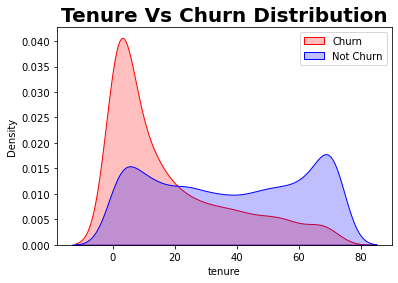

In [151]:
sns.kdeplot(df[df['Churn']=='Yes']['tenure'],color='Red',shade=True)
sns.kdeplot(df[df['Churn']=='No']['tenure'],color='Blue',shade=True)
plt.legend(['Churn','Not Churn'],loc='upper right')
plt.title('Tenure Vs Churn Distribution',fontdict={'fontweight':'bold','fontsize':20})

As the No of tenure increases Churn is also decreases. 

# Data PreProcessing

In [152]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

Label Encoder

In [153]:
from sklearn.preprocessing import LabelEncoder

In [154]:
lb=LabelEncoder()

In [155]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [156]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# STATASTICAL

In [157]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [158]:
df['TotalCharges'].value_counts()

1397.475    11
20.200      11
19.750       9
19.650       8
20.050       8
            ..
607.300      1
1534.050     1
1066.150     1
249.950      1
1024.000     1
Name: TotalCharges, Length: 6531, dtype: int64

Text(0.5, 1.0, 'Co-Relation Chart')

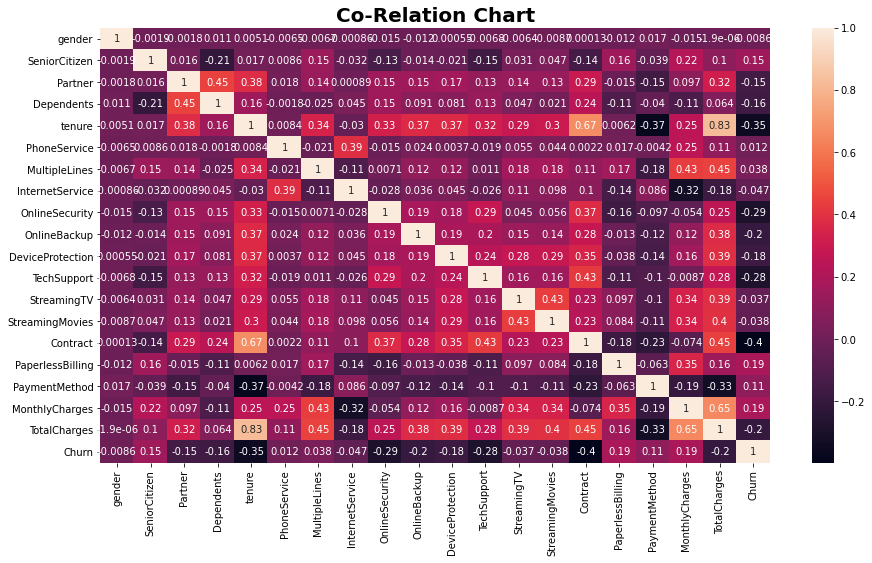

In [159]:
plt.figure(figsize=(15,8))
Corr=df.corr()
sns.heatmap(data=Corr,annot=True)
plt.title("Co-Relation Chart",fontdict={'fontweight':'bold','fontsize':20})

In [160]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

# VIF

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [163]:
valcal()

    vif factor          features
0     1.954266            gender
1     1.369575     SeniorCitizen
2     2.821462           Partner
3     1.963522        Dependents
4    14.741408            tenure
5    15.137915      PhoneService
6     2.753025     MultipleLines
7     4.352505   InternetService
8     2.249563    OnlineSecurity
9     2.456908      OnlineBackup
10    2.632625  DeviceProtection
11    2.383054       TechSupport
12    3.240593       StreamingTV
13    3.262125   StreamingMovies
14    4.160277          Contract
15    2.871827  PaperlessBilling
16    3.095909     PaymentMethod
17   20.437251    MonthlyCharges
18   13.744834      TotalCharges


In [164]:
x.drop(['tenure'],axis=1,inplace=True)

In [165]:
valcal()

    vif factor          features
0     1.928452            gender
1     1.362235     SeniorCitizen
2     2.753223           Partner
3     1.962810        Dependents
4    14.669616      PhoneService
5     2.696628     MultipleLines
6     4.331175   InternetService
7     2.233784    OnlineSecurity
8     2.443724      OnlineBackup
9     2.630603  DeviceProtection
10    2.382716       TechSupport
11    3.239199       StreamingTV
12    3.261915   StreamingMovies
13    3.401518          Contract
14    2.817794  PaperlessBilling
15    3.092590     PaymentMethod
16   18.911907    MonthlyCharges
17    6.967387      TotalCharges


In [166]:
x.drop('TotalCharges',axis=1,inplace=True)

In [167]:
valcal()

    vif factor          features
0     1.923192            gender
1     1.362158     SeniorCitizen
2     2.705530           Partner
3     1.949620        Dependents
4    14.163463      PhoneService
5     2.636793     MultipleLines
6     4.318307   InternetService
7     2.208669    OnlineSecurity
8     2.338041      OnlineBackup
9     2.597757  DeviceProtection
10    2.378448       TechSupport
11    3.230331       StreamingTV
12    3.252779   StreamingMovies
13    2.937303          Contract
14    2.808123  PaperlessBilling
15    2.802050     PaymentMethod
16   14.390121    MonthlyCharges


In [168]:
x.drop('PhoneService',axis=1,inplace=True)

In [169]:
valcal()

    vif factor          features
0     1.905785            gender
1     1.359754     SeniorCitizen
2     2.704374           Partner
3     1.940658        Dependents
4     2.557110     MultipleLines
5     2.393217   InternetService
6     2.187657    OnlineSecurity
7     2.337800      OnlineBackup
8     2.591790  DeviceProtection
9     2.364359       TechSupport
10    3.147181       StreamingTV
11    3.171631   StreamingMovies
12    2.901507          Contract
13    2.806590  PaperlessBilling
14    2.634340     PaymentMethod
15    7.949949    MonthlyCharges


In [170]:
x.drop('StreamingMovies',axis=1,inplace=True)

In [171]:
valcal()

    vif factor          features
0     1.905147            gender
1     1.359748     SeniorCitizen
2     2.704068           Partner
3     1.939794        Dependents
4     2.557103     MultipleLines
5     2.343101   InternetService
6     2.185893    OnlineSecurity
7     2.337603      OnlineBackup
8     2.557332  DeviceProtection
9     2.359245       TechSupport
10    2.932755       StreamingTV
11    2.867116          Contract
12    2.806560  PaperlessBilling
13    2.632510     PaymentMethod
14    7.469525    MonthlyCharges


In [172]:
x.drop('StreamingTV',axis=1,inplace=True)

In [173]:
valcal()

    vif factor          features
0     1.903845            gender
1     1.359139     SeniorCitizen
2     2.703660           Partner
3     1.939730        Dependents
4     2.556774     MultipleLines
5     2.250783   InternetService
6     2.178027    OnlineSecurity
7     2.337520      OnlineBackup
8     2.513274  DeviceProtection
9     2.350290       TechSupport
10    2.813785          Contract
11    2.806088  PaperlessBilling
12    2.628753     PaymentMethod
13    6.649849    MonthlyCharges


# Standard Scaler

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
std=StandardScaler()

In [176]:
X=std.fit_transform(x)

In [177]:
x=X

# Random State Selection

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [179]:
lg=LogisticRegression()

In [180]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 10 score is well
test score 78.14052519517388
train score 78.06176783812566
Random state 27 score is well
test score 78.21149751596877
train score 78.2392616258431
Random state 36 score is well
test score 78.21149751596877
train score 78.18601348952787
Random state 54 score is well
test score 78.14052519517388
train score 78.13276535321265
Random state 55 score is well
test score 78.21149751596877
train score 78.2392616258431
Random state 86 score is well
test score 78.06955287437899
train score 78.09726659566915
Random state 91 score is well
test score 78.14052519517388
train score 78.1150159744409
Random state 142 score is well
test score 78.28246983676365
train score 78.29250976215832
Random state 146 score is well
test score 78.35344215755855
train score 78.43450479233228
Random state 165 score is well
test score 78.21149751596877
train score 78.18601348952787
Random state 167 score is well
test score 78.21149751596877
train score 78.2392616258431
Random state 215 scor

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [182]:
y_train.value_counts()

0    4108
1    1526
Name: Churn, dtype: int64

# SMOTE

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_train,y_train)

In [185]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [186]:
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()
svcs=SVC(kernel='sigmoid')

In [187]:
def fun(f):
    f.fit(trainx,trainy)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [188]:
fun(lg)

Accuracy Score 72.39176721078779
Confusion Matrix
 [[757 309]
 [ 80 263]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1066
           1       0.46      0.77      0.57       343

    accuracy                           0.72      1409
   macro avg       0.68      0.74      0.69      1409
weighted avg       0.80      0.72      0.74      1409

F1 score 57.486338797814206


In [189]:
fun(svcs)

Accuracy Score 66.28814762242725
Confusion Matrix
 [[716 350]
 [125 218]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.67      0.75      1066
           1       0.38      0.64      0.48       343

    accuracy                           0.66      1409
   macro avg       0.62      0.65      0.61      1409
weighted avg       0.74      0.66      0.68      1409

F1 score 47.85949506037322


In [190]:
fun(svcl)

Accuracy Score 69.26898509581262
Confusion Matrix
 [[703 363]
 [ 70 273]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      1066
           1       0.43      0.80      0.56       343

    accuracy                           0.69      1409
   macro avg       0.67      0.73      0.66      1409
weighted avg       0.79      0.69      0.71      1409

F1 score 55.77119509703778


In [191]:
fun(svcp)

Accuracy Score 70.9013484740951
Confusion Matrix
 [[751 315]
 [ 95 248]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.70      0.79      1066
           1       0.44      0.72      0.55       343

    accuracy                           0.71      1409
   macro avg       0.66      0.71      0.67      1409
weighted avg       0.78      0.71      0.73      1409

F1 score 54.746136865342166


In [192]:
fun(svc)

Accuracy Score 73.17246273953158
Confusion Matrix
 [[783 283]
 [ 95 248]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.73      0.81      1066
           1       0.47      0.72      0.57       343

    accuracy                           0.73      1409
   macro avg       0.68      0.73      0.69      1409
weighted avg       0.79      0.73      0.75      1409

F1 score 56.75057208237986


In [193]:
fun(dtc)

Accuracy Score 71.11426543647977
Confusion Matrix
 [[816 250]
 [157 186]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1066
           1       0.43      0.54      0.48       343

    accuracy                           0.71      1409
   macro avg       0.63      0.65      0.64      1409
weighted avg       0.74      0.71      0.72      1409

F1 score 47.75353016688062


In [194]:
fun(knn)

Accuracy Score 67.63662171753016
Confusion Matrix
 [[732 334]
 [122 221]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.69      0.76      1066
           1       0.40      0.64      0.49       343

    accuracy                           0.68      1409
   macro avg       0.63      0.67      0.63      1409
weighted avg       0.75      0.68      0.70      1409

F1 score 49.220489977728285


In [195]:
fun(gb)

Accuracy Score 71.82398864442867
Confusion Matrix
 [[756 310]
 [ 87 256]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1066
           1       0.45      0.75      0.56       343

    accuracy                           0.72      1409
   macro avg       0.67      0.73      0.68      1409
weighted avg       0.79      0.72      0.74      1409

F1 score 56.32563256325632


# Ensemble Method

In [196]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRFClassifier

In [197]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
xgbr=XGBRFClassifier()

In [198]:
fun(rfc)

Accuracy Score 75.58552164655784
Confusion Matrix
 [[892 174]
 [170 173]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1066
           1       0.50      0.50      0.50       343

    accuracy                           0.76      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.76      0.76      0.76      1409

F1 score 50.14492753623189


In [199]:
fun(ad)

Accuracy Score 74.30801987224982
Confusion Matrix
 [[798 268]
 [ 94 249]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1066
           1       0.48      0.73      0.58       343

    accuracy                           0.74      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.74      0.76      1409

F1 score 57.90697674418603


In [200]:
fun(gd)

Accuracy Score 76.36621717530163
Confusion Matrix
 [[848 218]
 [115 228]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1066
           1       0.51      0.66      0.58       343

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.79      0.76      0.77      1409

F1 score 57.79467680608366


In [201]:
fun(xgb)

[15:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 76.65010645848119
Confusion Matrix
 [[882 184]
 [145 198]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1066
           1       0.52      0.58      0.55       343

    accuracy                           0.77      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.78      0.77      0.77      1409

F1 score 54.62068965517243


In [202]:
fun(xgbr)

[15:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 74.16607523066004
Confusion Matrix
 [[812 254]
 [110 233]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1066
           1       0.48      0.68      0.56       343

    accuracy                           0.74      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.78      0.74      0.75      1409

F1 score 56.144578313253


In [203]:
fun(sgd)

Accuracy Score 70.40454222853087
Confusion Matrix
 [[730 336]
 [ 81 262]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.68      0.78      1066
           1       0.44      0.76      0.56       343

    accuracy                           0.70      1409
   macro avg       0.67      0.72      0.67      1409
weighted avg       0.79      0.70      0.72      1409

F1 score 55.685441020191284


# Hyper Tuning For Best Score

In [204]:
from sklearn.model_selection import GridSearchCV

Support Vector Classifier

In [205]:
p2=[{'kernel':['linear','poly','sigmoid'],'gamma':['auto','scale'],'max_iter':[1,2,3,4],'C':[0.01,0.1,0.0001,1,2,3,50,100],'class_weight':['dict','balanced']}]

In [94]:
gd1=GridSearchCV(svc,p2)
gd1.fit(trainx,trainy)
print(gd1.best_params_)

{'C': 2, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 3}


In [206]:
svc1=SVC(kernel='poly',C=0.1,gamma='scale',probability=True)

In [115]:
fun(svc1)

Accuracy Score 69.26898509581262
Confusion Matrix
 [[703 363]
 [ 70 273]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      1066
           1       0.43      0.80      0.56       343

    accuracy                           0.69      1409
   macro avg       0.67      0.73      0.66      1409
weighted avg       0.79      0.69      0.71      1409

F1 score 55.77119509703778


Ada Boosting Classifier

In [123]:
p1={'n_estimators':[100,150,250,500],'learning_rate':[0.1,0.01,0.001],'random_state':[13,61,100]}

In [124]:
gd1=GridSearchCV(ad,p1)
gd1.fit(trainx,trainy)
print(gd1.best_params_)

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 13}


In [125]:
ad1=AdaBoostClassifier(learning_rate=0.1,n_estimators=500,random_state=13)

In [126]:
fun(ad1)

Accuracy Score 76.5081618168914
Confusion Matrix
 [[785 254]
 [ 77 293]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      1039
           1       0.54      0.79      0.64       370

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409

F1 score 63.904034896401306


# Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
for i in range(2,11):
    score=cross_val_score(svc1,trainx,trainy,cv=i)
    print("score at cv=",i,score.mean()*100)

score at cv= 2 79.71032132424538
score at cv= 3 81.03778418008311
score at cv= 4 81.87682570593964
score at cv= 5 81.65917340098005
score at cv= 6 82.02572961598412
score at cv= 7 82.46258135874155
score at cv= 8 82.70447906523856
score at cv= 9 82.85134157042843
score at cv= 10 82.64689669888065


# AUR ROC CURVE

In [208]:
from sklearn.metrics import roc_curve,roc_auc_score

In [209]:
y_pred_prob=svc1.predict_proba(x_test)[:,1]

In [210]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,svc1.predict(x_test)))

ROC Score 0.7290024559810523


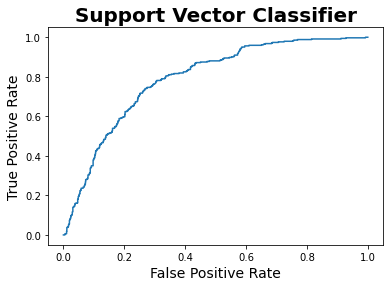

In [211]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('Support Vector Classifier',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

# In This Case 1 For Churn and 0 For Not Churn

# So We Get 80% Recall It Means Model Find 80% Churn Customes & Its Predicted Correctly.

# Saving Model

In [212]:
import pickle
filename='Customer_Churn_Prediction.pkl'
pickle.dump(svc1,open(filename,'wb'))

# Conclusion

In [213]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=svc1.predict(x_test)

print(res)

      Actual  Predict
6418       0        0
1948       1        1
4497       0        0
66         0        1
1705       0        1
...      ...      ...
1901       0        0
5938       0        1
6373       0        1
1767       0        0
2184       1        1

[1409 rows x 2 columns]


# Summary:
1)The model will catch 80 of the customers who will actually churn.

2)The model will catch 66% of the customers who will actually Not churn.

3)Overall all accuracy is 76%
